In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from matplotlib import colors
from sklearn.decomposition import PCA



In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [5]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

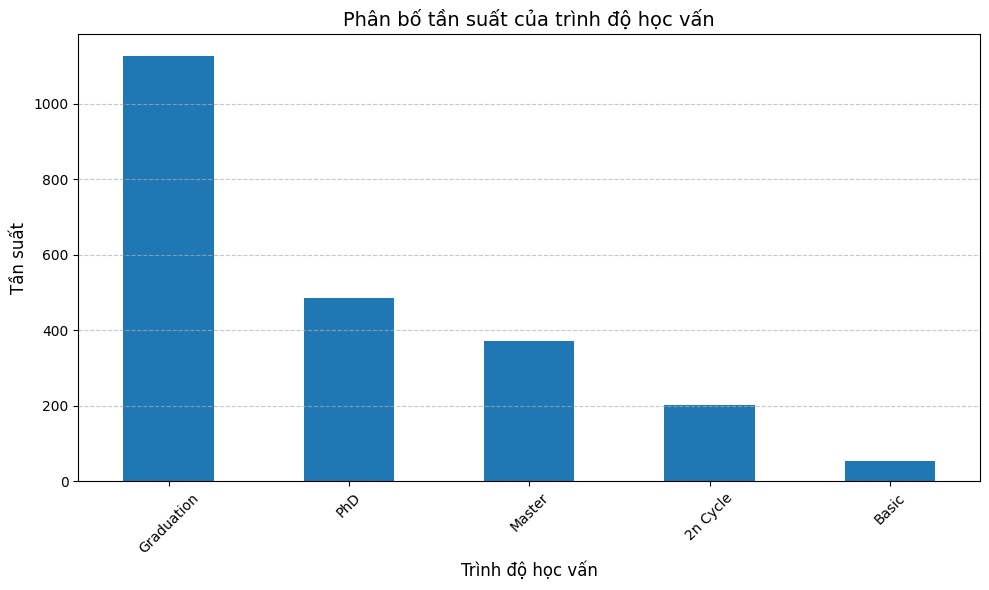

In [12]:
import matplotlib.pyplot as plt

# Extract the categorical column
categorical_data = df['Education']

# Calculate the frequency of each category
category_counts = categorical_data.value_counts()

# Plot the histogram (bar chart for categorical data)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Phân bố tần suất của trình độ học vấn', fontsize=14)
plt.xlabel('Trình độ học vấn', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig("edu.jpg", dpi=300)  # Save the plot with higher resolution
plt.show()


In [6]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [7]:
import pandas as pd
import datetime

def get_different_year(df):
    # Convert 'Dt_Customer' to datetime, handling errors
    registration_year = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce').apply(lambda x: x.year)

    # Get the current year
    current_year = datetime.datetime.now().year

    # Calculate and return the difference, handling potential NaT values
    return current_year - registration_year.fillna(current_year)

# If 'df' is a slice, make a copy to ensure no warning
df = df.copy()

# Calculate years since registration
df.loc[:, 'Years_Since_Registration'] = get_different_year(df)

# Ensure the column is numeric
df.loc[:, "Years_Since_Registration"] = pd.to_numeric(df["Years_Since_Registration"], errors="coerce")


In [9]:
df["Years_Since_Registration"].unique()

array([12, 10, 11], dtype=int64)

In [8]:
df["Years_Since_Registration"].head()

0    12
1    10
2    11
3    10
4    10
Name: Years_Since_Registration, dtype: int64

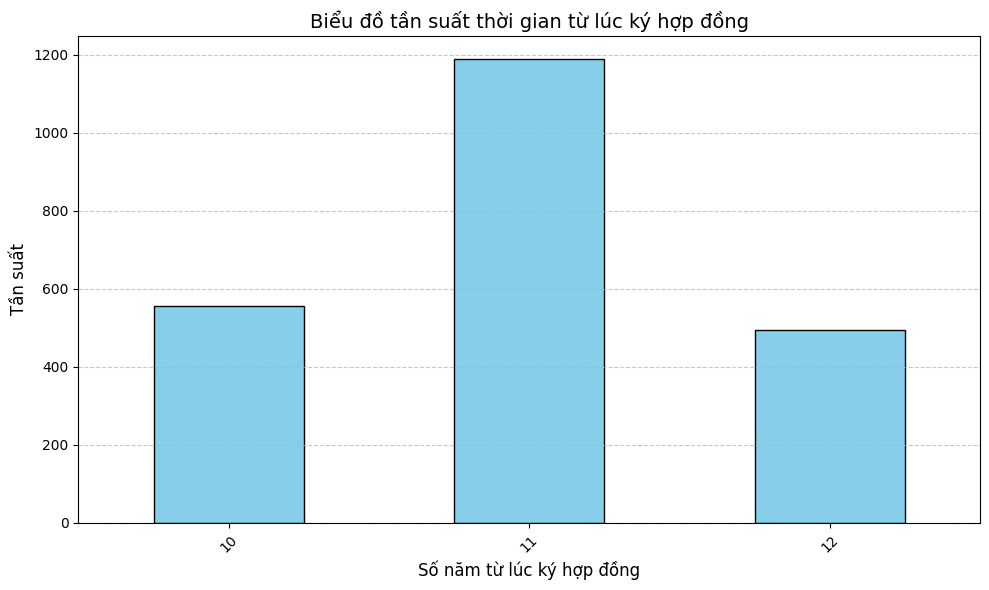

In [10]:
import matplotlib.pyplot as plt

# Extract the categorical column
categorical_data = df["Years_Since_Registration"]

# Drop NaN values to avoid plotting issues
categorical_data = categorical_data.dropna()

# Calculate the frequency of each category
category_counts = categorical_data.value_counts().sort_index()  # Sort by index (years)

# Plot the histogram (bar chart for categorical data)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Biểu đồ tần suất thời gian từ lúc ký hợp đồng', fontsize=14)
plt.xlabel('Số năm từ lúc ký hợp đồng', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig("Ed.jpg", dpi=300)  # Higher resolution for the image
plt.show()


DATA PREPOCESSING


In [10]:
data = df

In [13]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Years_Since_Registration
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,12
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,10
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,11
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,10
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,11
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,10
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,10
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,10


In [11]:
data1 = df

In [1]:
df['Education'].describe()

NameError: name 'df' is not defined

C:\Users\MAY02\AppData\Local\Temp\ipykernel_22060\4004851279.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')


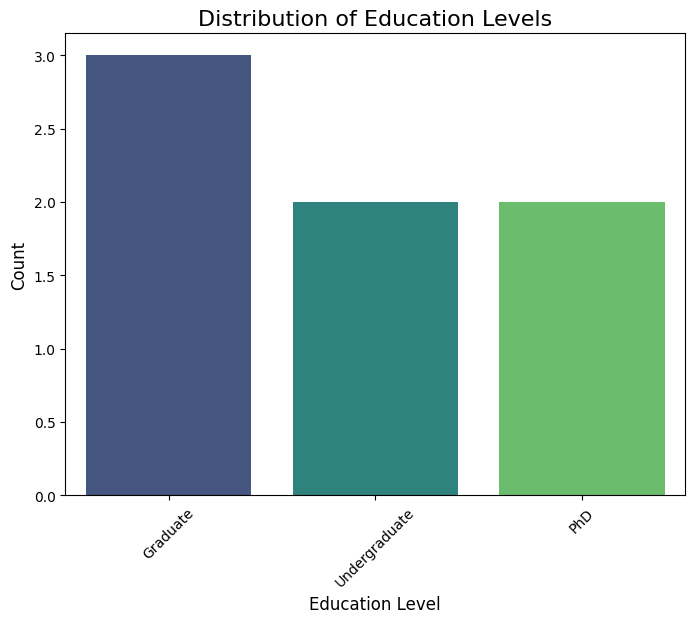

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual DataFrame)
data = {'Education': ['Graduate', 'Undergraduate', 'Graduate', 'PhD', 'PhD', 'Undergraduate', 'Graduate']}
df = pd.DataFrame(data)

# Count the frequency of each category
education_counts = df['Education'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title('Distribution of Education Levels', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


In [ ]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

NameError: name 'data' is not defined

In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

NameError: name 'object_cols' is not defined

In [ ]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,272,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,4,5,64014.0,2,1,207,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2,2,56981.0,0,0,521,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3,5,69245.0,0,1,500,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
#Feature Engineering
#Age of customer today
data["Age"] = datetime.datetime.now().year - data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
data = data.drop(to_drop, axis=1)

In [ ]:
data['Spent']

,Spent
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [ ]:
data.describe()

,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,2.393750,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.064286,0.013393,0.009375,0.149107,55.194196,605.798214,3.729911,0.950446,4.680357,0.715179
std,3246.662198,1.124797,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.245316,0.114976,0.096391,0.356274,11.984069,602.249288,1.076277,0.751803,1.301241,0.451430
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,2.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,47.000000,68.750000,3.000000,0.000000,4.000000,0.000000
50%,5458.500000,2.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,54.000000,396.000000,4.000000,1.000000,5.000000,1.000000
75%,8427.750000,3.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,65.000000,1045.500000,5.000000,1.000000,6.000000,1.000000
max,11191.000000,4.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,7.000000,3.000000,8.000000,1.000000


In [ ]:
data

,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,2,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,67,1617,4,0,4,0
1,2174,2,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,70,27,4,2,6,1
2,4141,2,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,59,776,5,0,5,0
3,6182,2,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,40,53,5,1,6,1
4,5324,4,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,43,422,3,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,57,1341,3,1,4,1
2236,4001,4,64014.0,2,1,56,406,0,30,0,...,1,0,0,0,78,444,5,3,8,1
2237,7270,2,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,43,1241,2,0,2,0
2238,8235,3,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,68,843,5,1,6,1


In [ ]:
import pandas as pd
import datetime

def get_different_year():
    # Try to convert the 'Dt_Customer' column to datetime, handling errors
    registration_year = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce').apply(lambda x: x.year)

    # Get current year
    current_year = datetime.datetime.now().year

    # Calculate and return the difference, handling potential NaT (Not a Time) values
    return current_year - registration_year.fillna(current_year) # Fill NaT with current year to avoid errors

# Apply the function and convert to numeric, handling errors
df['Years_Since_Registration'] = get_different_year()
df["Years_Since_Registration"] = pd.to_numeric(df["Years_Since_Registration"], errors="coerce")

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

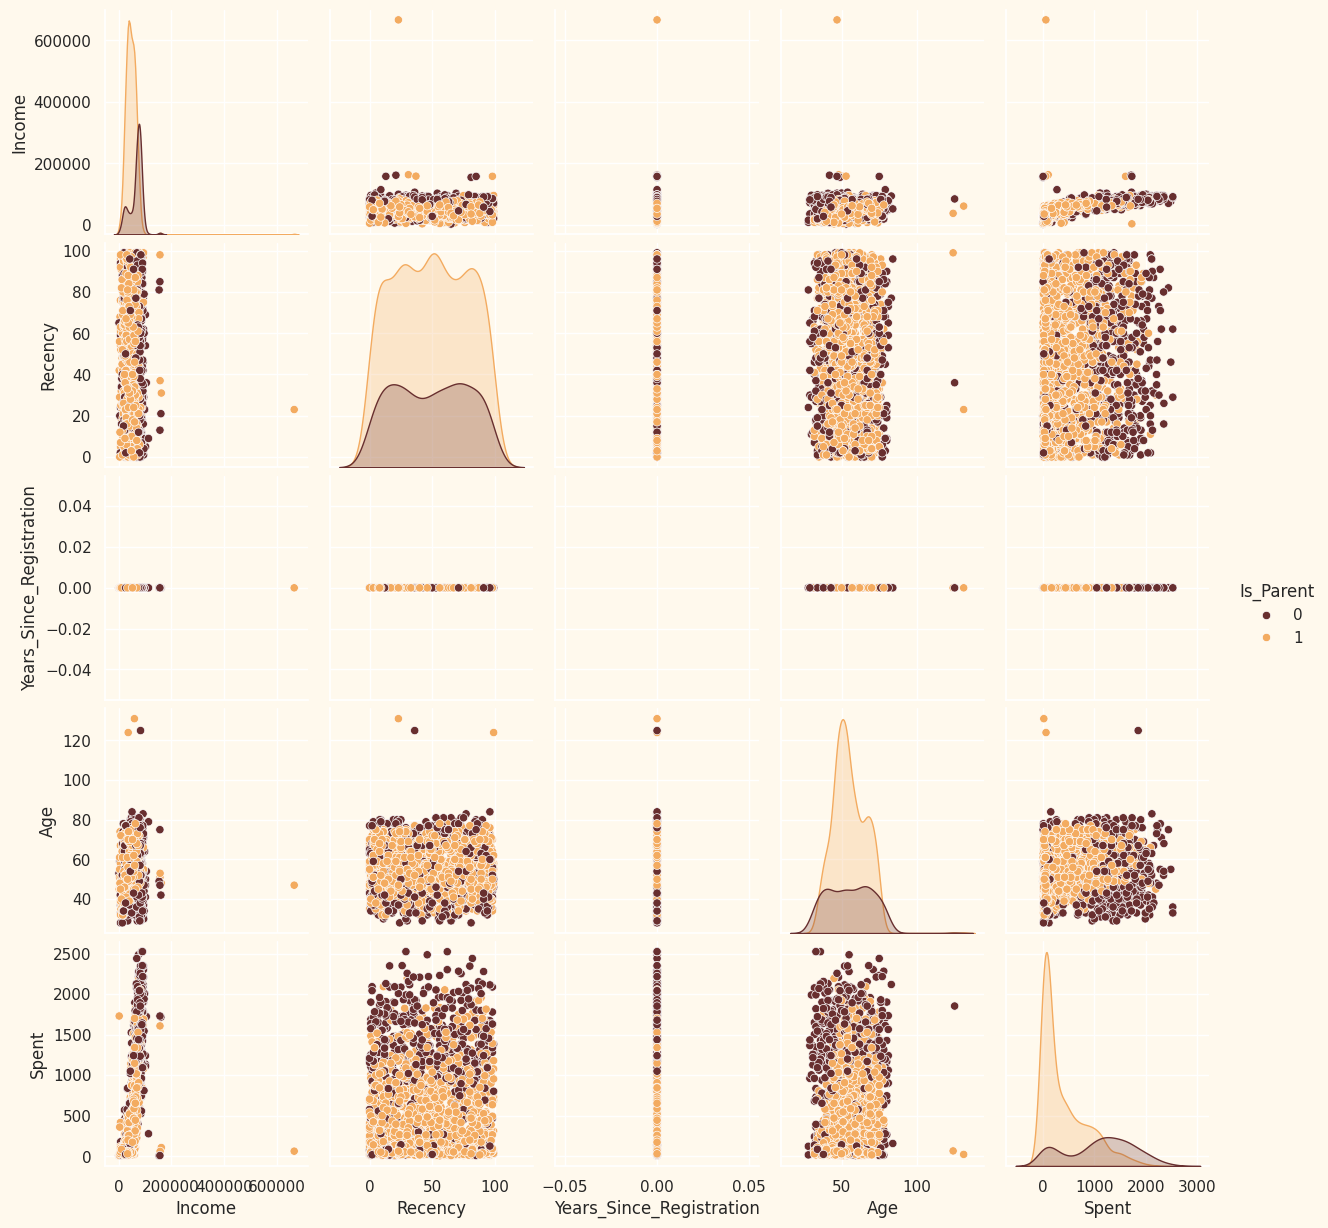

In [ ]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors


# Assuming 'data' is your original DataFrame

def get_different_year(df): # Pass the DataFrame as an argument
    # Try to convert the 'Dt_Customer' column to datetime, handling errors
    # CHANGED: Using 'df' instead of 'data' to access the column
    registration_year = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce').apply(lambda x: x.year)

    # Get current year
    current_year = datetime.datetime.now().year

    # Calculate and return the difference, handling potential NaT (Not a Time) values
    return current_year - registration_year.fillna(current_year) # Fill NaT with current year to avoid errors

# Apply the function and convert to numeric, handling errors
# CHANGED: Renaming 'data' to 'df' since 'Dt_Customer' likely exists in 'df'
df['Years_Since_Registration'] = get_different_year(df) # Call the function with 'df'
df["Years_Since_Registration"] = pd.to_numeric(df["Years_Since_Registration"], errors="coerce")

#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
# CHANGED: If you need to plot using 'data' DataFrame make sure it has the required columns
# You might need to merge/copy the 'Years_Since_Registration' from 'df' to 'data'
To_Plot = [ "Income", "Recency", "Years_Since_Registration", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
# CHANGED: Replace 'data' with 'df' if needed depending on your data structure
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

In [ ]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


<Axes: >

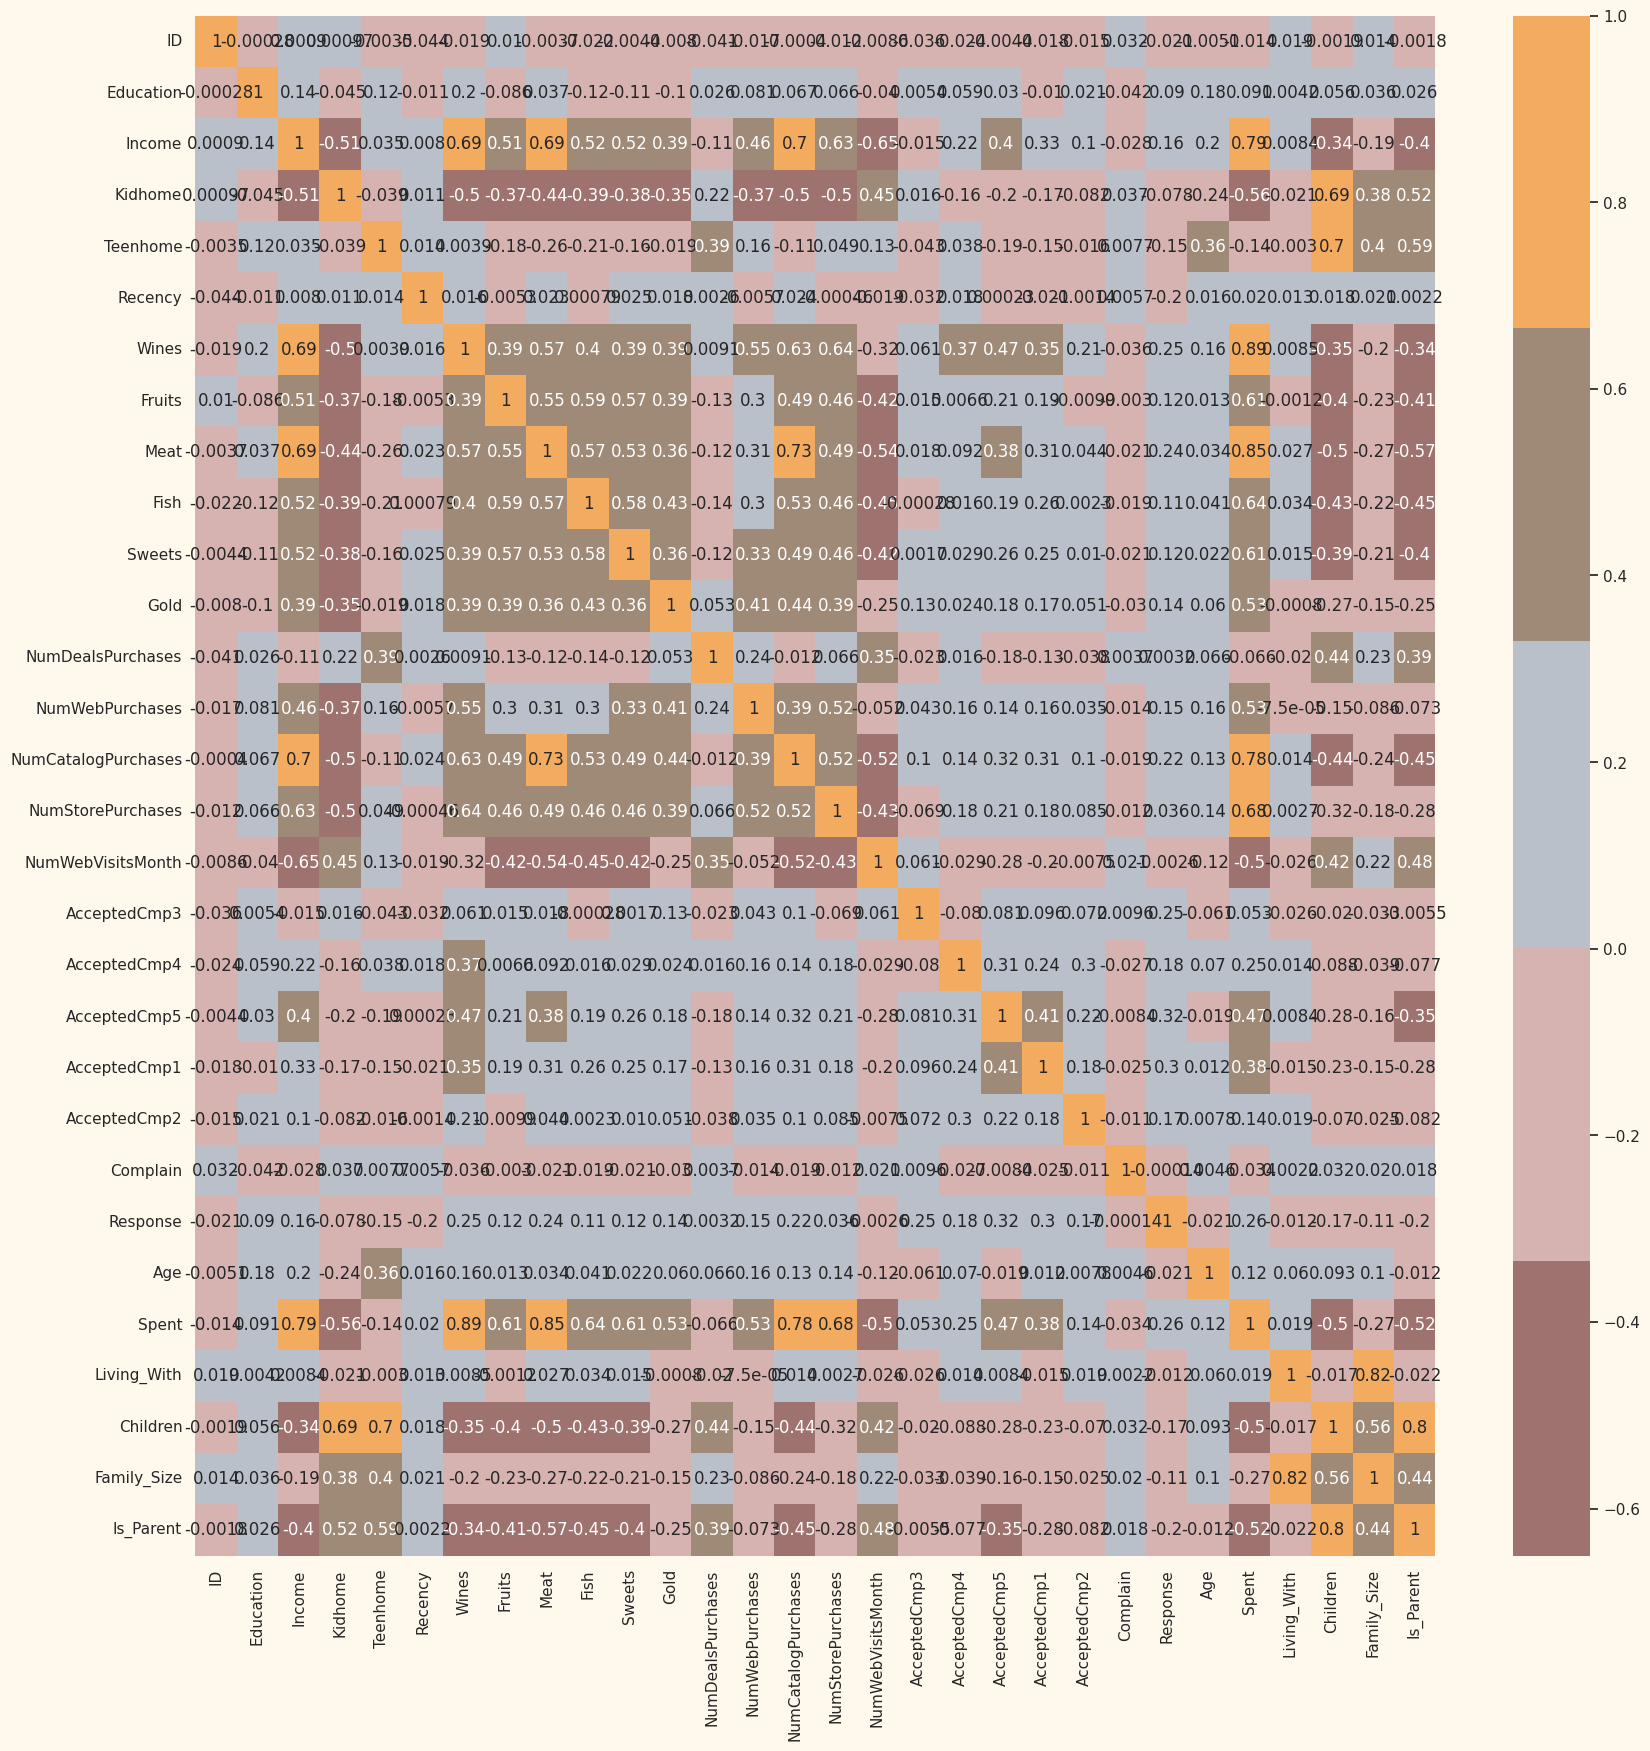

In [ ]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

RFM analysis

**Recency:** How recently a customer has made a purchase

**Frequency:** How frequently a customer makes purchases

**Monetary Value:** How much a customer spends on purchases

In [ ]:
# Customer's total spent on products
data['Total_Spent'] = data['Wines'] + data['Fruits'] + data['Meat'] + data['Fish'] + data['Sweets'] + data['Gold']

#Narrowing down to these columns to 1 total category
data['Num_Total_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [ ]:
data['Frequency'] = data["Num_Total_Purchases"]
data['Monetary'] = data["Total_Spent"]`

In [ ]:
rfm = data.loc[:, ['ID','Recency', 'Frequency', 'Monetary']]
rfm.head()

,ID,Recency,Frequency,Monetary
0,5524,58,25,1617
1,2174,38,6,27
2,4141,26,21,776
3,6182,26,8,53
4,5324,94,19,422


In [ ]:
def rfm_scores(dataframe):
    dataframe["recency_score"] = pd.qcut(dataframe["Recency"], 5, labels=[5, 4, 3, 2, 1])
    dataframe["frequency_score"] = pd.qcut(dataframe["Frequency"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["monetary_score"] = pd.qcut(dataframe["Monetary"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["rfm_score"] = dataframe["recency_score"].astype(str) + dataframe["frequency_score"].astype(str)
    return dataframe


rfm_scores(rfm)
rfm.head()

,ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,rfm_score
0,5524,58,25,1617,3,5,5,35
1,2174,38,6,27,4,1,1,41
2,4141,26,21,776,4,4,4,44
3,6182,26,8,53,4,2,1,42
4,5324,94,19,422,1,4,3,14


In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Total_Spent,Num_Total_Purchases,Frequency,Monetary
0,-0.018837,-0.352543,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,...,1.018352,1.676245,0.254760,-1.264598,-0.517224,-1.581139,1.676245,1.317945,1.317945,1.676245
1,-1.050626,-0.352543,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,...,1.274785,-0.963297,0.254760,1.404572,1.019511,0.632456,-0.963297,-1.159273,-1.159273,-0.963297
2,-0.444797,-0.352543,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,...,0.334530,0.280110,1.183144,-1.264598,0.251144,-1.581139,0.280110,0.796425,0.796425,0.280110
3,0.183824,-0.352543,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,...,-1.289547,-0.920135,1.183144,0.069987,1.019511,0.632456,-0.920135,-0.898513,-0.898513,-0.920135
4,-0.080437,1.429916,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,...,-1.033114,-0.307562,-0.673624,0.069987,-0.517224,0.632456,-0.307562,0.535666,0.535666,-0.307562


<a id="5"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>
In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.*

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, I will be reducing the dimensions to 3.


In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.156399e-16,3.331372,-5.642035,-3.149318,-0.714959,2.910503,8.897532
col2,2212.0,-7.066881e-17,1.817423,-4.483890,-1.436576,-0.149625,1.319840,6.475268
col3,2212.0,-1.606109e-17,1.313475,-4.699980,-0.952677,-0.127581,1.052181,3.815627


In [ ]:
PCA_ds

,col1,col2,col3,Clusters
0,5.509255,-0.424371,0.179599,2
1,-3.624064,0.531833,1.085933,0
2,2.556668,-0.657451,0.990319,3
3,-3.363755,-0.843696,1.238796,0
4,-0.210050,0.474918,-1.174657,1
...,...,...,...,...
2207,3.165507,1.124873,-0.864868,3
2208,-1.668572,5.217591,1.365256,1
2209,2.923297,-1.987070,-2.181007,2
2210,2.172985,1.945696,1.429739,3


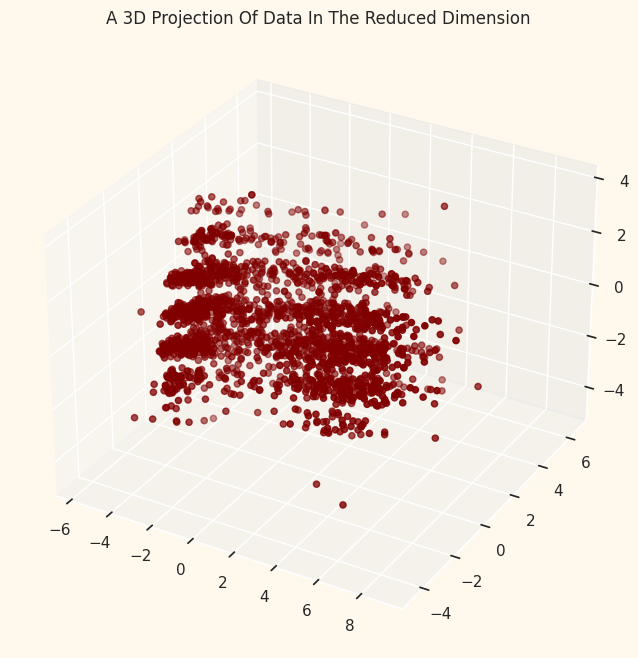

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Customer Analytics by <u>**STP**</u> : Segmentation, Targeting and Positioning <br>
**1-Segmentation:** dividing a population into groups that share similar charachteristics.<br>
**2-Targeting:** evaluating potential profits from segments and deciding which segment to focus on.<br>
**3-Positioning:** what product would have the closest characteristics to customers' need.  


<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SEGMENTATION</p>


**Main benefits of segmentation:**
<ol><li>Increase sales/revenue
<li>Improve marketing
<li>Increase customer retention / decrease churn
</ol>

Now that I have reduced the attributes to three dimensions, I will be performing segmentation by clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

In [ ]:
from yellowbrick.cluster import KElbowVisualizer


In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering



**Average silhouette method**
*italicized text*



**Sử dụng elbow method tìm số cụm**

Elbow Method to determine the number of clusters to be formed:


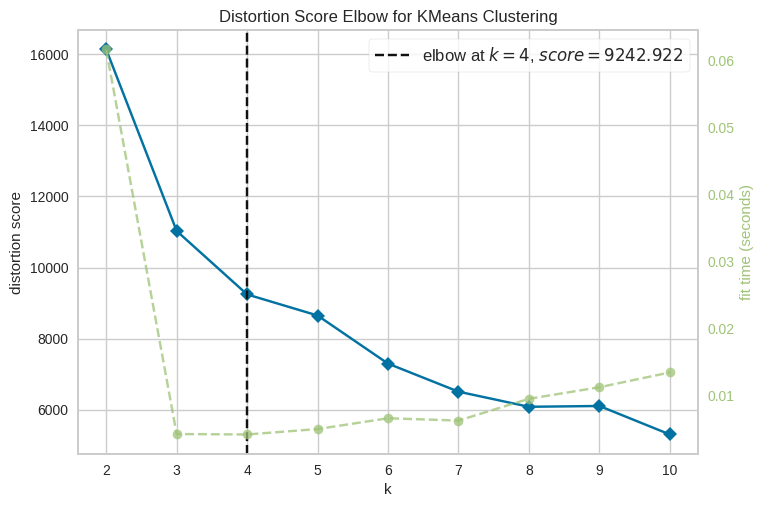

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()


---

**Sử dụng agglomerative (Chiến lược hợp nhất để phân cụm)**

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

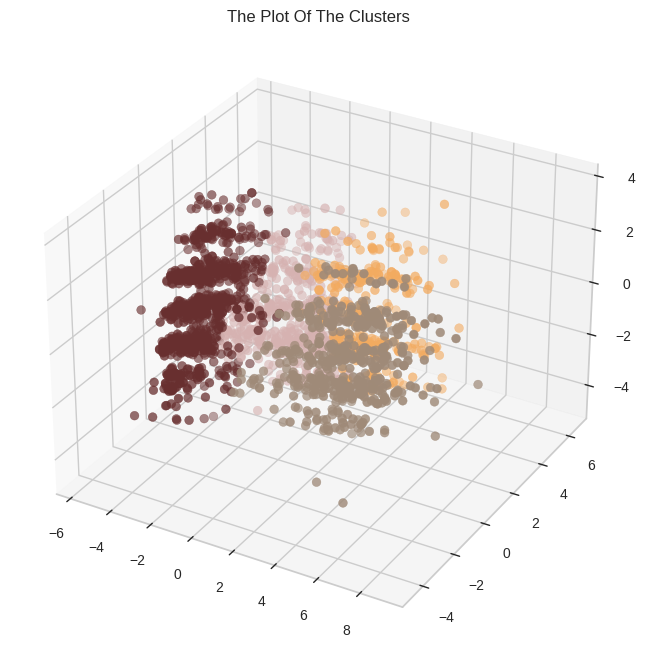

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUATING MODELS</p>

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

**Firstly, let us have a look at the group distribution of clustring**

<ipython-input-81-2f63248a592e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)


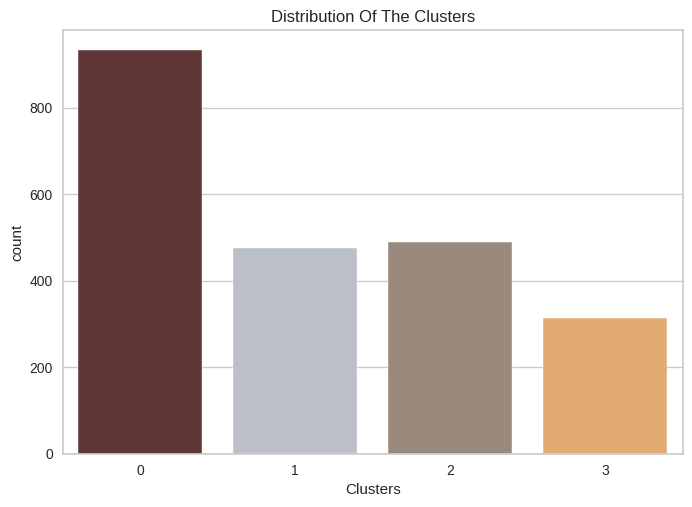

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

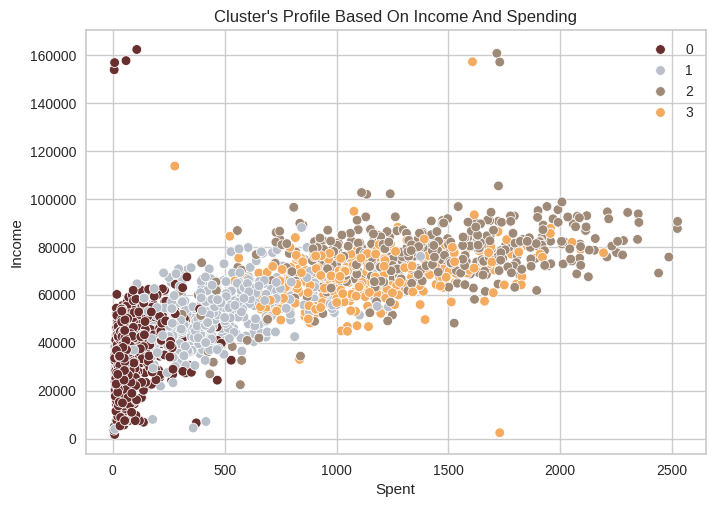

In [ ]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()